In [118]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [119]:
x=pd.read_csv('../data/data.csv')
x.head()

,0,1,2,3,4,5,6,7
0,-2.084839,-0.471673,-0.955542,-0.567288,-0.953226,-1.510386,0.921728,0.437954
1,0.003700,-0.999118,0.202003,1.612001,-0.375642,0.378518,0.113693,1.718011
2,-1.456240,0.483522,-0.508605,-0.316406,-1.695560,-1.943310,0.299486,0.147370
3,-1.595524,-0.219744,1.039403,0.381587,0.109094,-0.155068,0.156054,0.007314
4,0.995277,-1.517259,-0.101198,1.415742,-0.054356,0.611216,0.196938,0.641809


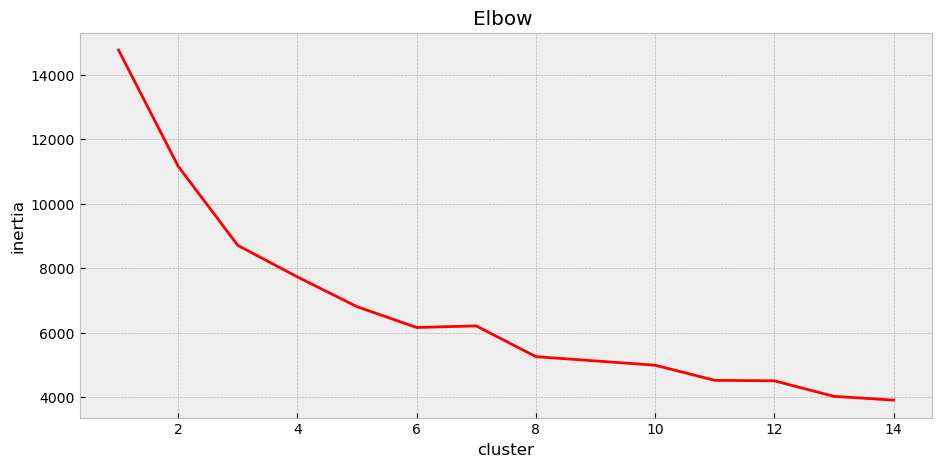

In [121]:
inertia=[]
for i  in range(1,15):

    model=KMeans(n_clusters=i)
    model.fit(x)
    inertia.append(model.inertia_)

plt.style.use('bmh')
plt.figure(figsize=(11,5))
plt.plot(range(1,15),inertia,color='r')
plt.title('Elbow ')
plt.xlabel('cluster')
plt.ylabel('inertia')
plt.show()

In [122]:
x_train,x_test=train_test_split(x,test_size=0.3,random_state=41)

In [123]:
model=KMeans(n_clusters=7,init='k-means++')
model.fit(x_train)

KMeans(n_clusters=7)

In [124]:
x_train.shape

(916, 8)

In [125]:
x_test.shape

(393, 8)

In [126]:
model.labels_[:40]

array([2, 5, 2, 6, 2, 5, 0, 3, 1, 5, 1, 6, 0, 1, 3, 6, 2, 6, 1, 1, 3, 3,
       6, 6, 1, 2, 1, 0, 1, 0, 1, 3, 3, 2, 2, 1, 1, 2, 2, 4])

In [127]:
pred=model.predict(x_test)
pred[:70]

array([0, 5, 3, 2, 1, 1, 6, 6, 3, 2, 3, 3, 1, 2, 3, 5, 3, 1, 1, 4, 4, 1,
       3, 5, 0, 3, 2, 2, 6, 3, 3, 2, 1, 3, 3, 1, 6, 3, 1, 1, 0, 5, 1, 1,
       6, 1, 1, 4, 2, 2, 6, 4, 2, 2, 5, 3, 1, 6, 2, 2, 2, 5, 0, 0, 2, 6,
       1, 3, 0, 1])

In [128]:
silhouette_score(x_test,pred)

0.2501504143755614

0.5511916046195919
2      0.6810461692117462
3      0.5528190123564095
4      0.49535632852884987
5      0.3671251459582782
6      0.3357163301956626
7      0.4609989363851642
8      0.3300623912854952
9      0.3265275479968279
10      0.3084294157079097


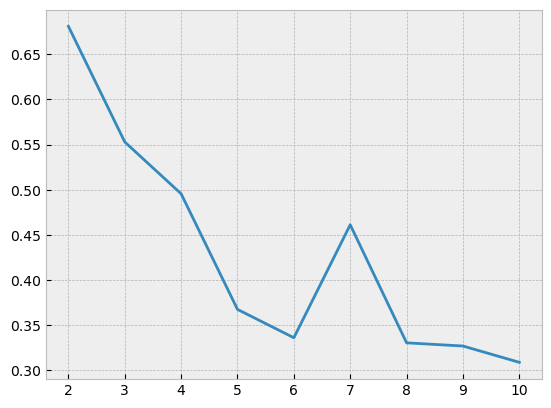

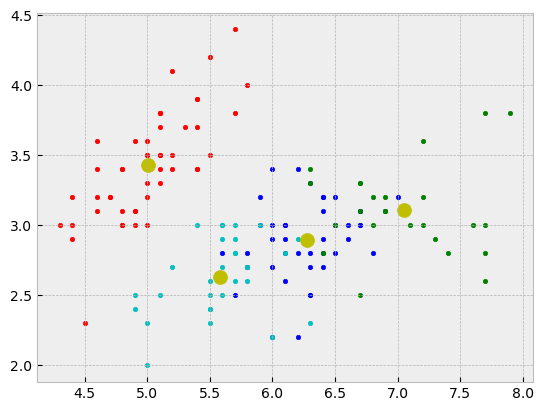

In [129]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

kmean = KMeans(n_clusters= 3 )

kmean.fit(X)

result = kmean.labels_

print(silhouette_score(X , result))


score = []
for n in range(2,11):
    kmean = KMeans(n_clusters= n )
    kmean.fit(X)
    result = kmean.labels_
    print(n , '    '  , silhouette_score(X , result))
    score.append(silhouette_score(X , result))
    
plt.plot(range(2,11) , score)
plt.show()

kmean = KMeans(n_clusters= 4 )

    
y_kmeans = kmean.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'r')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'b')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'g')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'c')
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 100, c = 'y')
plt.show()


